<a href="https://colab.research.google.com/github/nurdianarhm/Penambangan-Data-dan-Analisis-Bisnis/blob/main/T3_Preprocessing%20data%20elektronik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. a. Download dataset produk_elektronik.csv yang ada pada link berikut
https://bit.ly/dataprodukelektronik

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('/content/produk_elektronik.csv')
data

,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
0,1,Produk_1,Smartwatch,746.0,4.2,273.0,Japan
1,2,Produk_2,Headphone,241.0,3.5,239.0,Canada
2,3,Produk_3,Tablet,810.0,3.8,209.0,Canada
3,4,Produk_4,Headphone,303.0,3.2,59.0,South Korea
4,5,Produk_5,Headphone,252.0,3.7,76.0,South Korea
...,...,...,...,...,...,...,...
545,546,Produk_546,Laptop,496.0,3.9,19.0,China
546,547,Produk_547,Headphone,628.0,4.7,414.0,USA
547,548,Produk_548,Tablet,465.0,4.3,393.0,India
548,549,Produk_549,Laptop,495.0,3.1,311.0,Germany


b. Tampilkan informasi tipe data setiap kolom dan cek apakah ada missing values.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   produk_id      550 non-null    int64  
 1   nama_produk    550 non-null    object 
 2   kategori       550 non-null    object 
 3   harga          520 non-null    float64
 4   rating         500 non-null    float64
 5   jumlah_ulasan  530 non-null    float64
 6   negara_asal    550 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 30.2+ KB


In [8]:
data.isnull()

,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
545,False,False,False,False,False,False,False
546,False,False,False,False,False,False,False
547,False,False,False,False,False,False,False
548,False,False,False,False,False,False,False


2. a. Cek missing values pada dataset. Berapa jumlah missing values di setiap kolom?

In [9]:
np.sum(data.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
produk_id,0
nama_produk,0
kategori,0
harga,30
rating,50
jumlah_ulasan,20
negara_asal,0


berdasarkan output diatas, dapat diketahui bahwa kolom yang mengandung missing values adalah kolom harga dengan jumlah = 30, kolom rating = 50 dan kolom jumlah_ulasan = 20

In [7]:
#mengetahui jumlah missing value di seluruh dataset
data.isnull().sum().sum()

100

b. Jelaskan bagaimana keberadaan missing values dapat memengaruhi analisis data.
1. missing values dapat mengurangi jumlah sampel atau observasi dalam dataset. Jika proporsi missing values cukup besar, hal ini dapat mempengaruhi kemampuan untuk mendeteksi hubungan atau perbedaan yang signifikan dalam analisis

2. missing values dapat menyebabkan bias jika data yang hilang tidak acak. Hal ini dapat menghasilkan Kesimpulan yang tidak akurat

3. 	missing values dapat menyebabkan perhitungan statistic tidak valid atau menghasilkan error. Misalnya, jika terdapat variable yang memiliki missing values seluruh observasi mungkin diabaikan dalam analisis

4.	missing value dapat mengubah estimasi parameter dan hal ini dapat mempengaruhi intrepetasi hasil dan pengambilan keputusan


c. Tentukan metode yang paling sesuai untuk menangani missing values di setiap kolom. Berikan alasan pemilihan metode tersebut.
1. harga (Menggunakan Mean)

Mean (rata-rata) digunakan karena harga biasanya memiliki distribusi yang cukup normal dalam banyak kasus. Jika harga tidak memiliki outlier ekstrem, mean dapat memberikan estimasi yang baik terhadap nilai yang hilang.
2. rating (Menggunakan Median)

Rating biasanya memiliki distribusi yang tidak merata. Menggunakan median lebih baik karena lebih tahan terhadap outlier yang bisa mempengaruhi rata-rata.
3. jumlah_ulasan (Menggunakan Median)

Jumlah ulasan bisa sangat bervariasi dan cenderung memiliki distribusi yang tidak normal. Oleh karena itu, median lebih cocok untuk menghindari bias akibat data ekstr

d. Tangani missing values dengan metode yang sesuai

In [85]:
#mengisi missing value harga
data['harga']=data['harga'].fillna(data['harga'].mean())

In [86]:
#jumlah missing value harga
np.sum(data['harga'].isnull())

0

In [87]:
#mengisi missing value rating
data['rating']=data['rating'].fillna(data['rating'].median())

In [88]:
#jumlah missing value rating
np.sum(data['rating'].isnull())

0

In [89]:
#mengisi missing value
data['jumlah_ulasan']=data['jumlah_ulasan'].fillna(data['jumlah_ulasan'].median())

In [90]:
# jumlah missing value jumlah_ulasan
np.sum(data['jumlah_ulasan'].isnull())

0

3. a. Identifikasi outlier dalam dataset

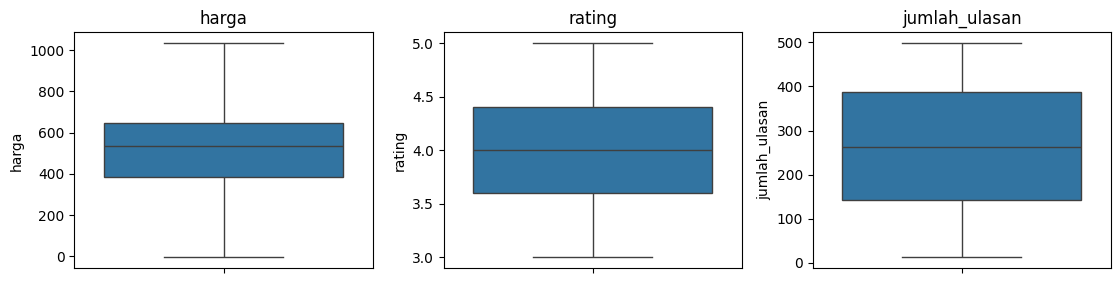

In [92]:
# Kolom numerik yang ingin dicek outliernya
num_cols = ['harga','rating', 'jumlah_ulasan']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

b. Apa dampak dari keberadaan outlier terhadap analisis?
1. Outlier dapat memengaruhi nilai mean (rata-rata) secara signifikan karena mean sangat sensitif terhadap nilai ekstrem
2. Outlier dapat meningkatkan nilai varians dan standar deviasi, yang mengindikasikan sebaran data
3. outlier dapat mempengaruhi hasil uji statistic
4. Outlier dapat membuat visualisasi data, seperti boxplot, scatterplot, atau histogram, menjadi sulit dibaca atau diinterpretasikan

c. Pilih metode yang sesuai untuk menangani outlier dan jelaskan alasan pemilihannya.
Winsorizing karena tidak menghapus data, melainkan hanya mengganti nilai outlier. Hal ini memungkinkan kita mempertahankan jumlah sampel yang sama

d. Tangani outlier dengan metode yang sesuai, atau jika memilih tidak menangani
outlier berikan alasannya.


In [46]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Kuartil 1
    Q3 = data[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")

harga: 14 outliers
rating: 0 outliers
jumlah_ulasan: 0 outliers


In [48]:
def winsorize_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

for col in num_cols:
    winsorize_iqr(data, col)

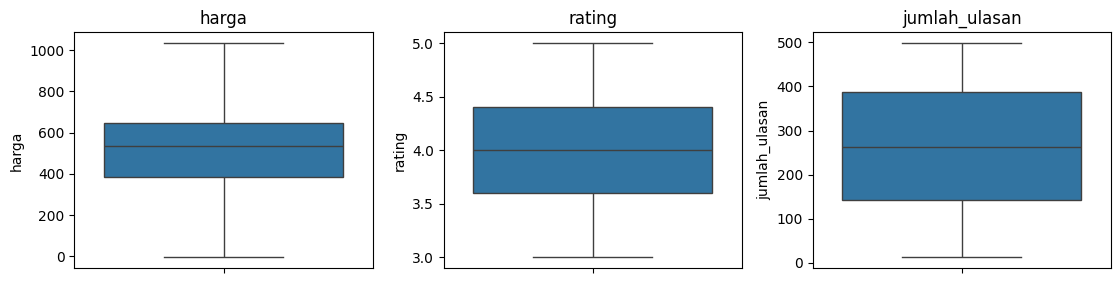

In [49]:
#cek boxplot
num_cols = ['harga','rating', 'jumlah_ulasan']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

4. a. Tentukan kolom mana yang memerlukan encoding.

In [52]:
from sklearn.preprocessing import LabelEncoder
# Label Encoding
le = LabelEncoder()
data['nama_produk'] = le.fit_transform(data['nama_produk'])

In [53]:
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Produk_1': 0, 'Produk_10': 1, 'Produk_100': 2, 'Produk_101': 3, 'Produk_102': 4, 'Produk_103': 5, 'Produk_104': 6, 'Produk_105': 7, 'Produk_106': 8, 'Produk_107': 9, 'Produk_108': 10, 'Produk_109': 11, 'Produk_11': 12, 'Produk_110': 13, 'Produk_111': 14, 'Produk_112': 15, 'Produk_113': 16, 'Produk_114': 17, 'Produk_115': 18, 'Produk_116': 19, 'Produk_117': 20, 'Produk_118': 21, 'Produk_119': 22, 'Produk_12': 23, 'Produk_120': 24, 'Produk_121': 25, 'Produk_122': 26, 'Produk_123': 27, 'Produk_124': 28, 'Produk_125': 29, 'Produk_126': 30, 'Produk_127': 31, 'Produk_128': 32, 'Produk_129': 33, 'Produk_13': 34, 'Produk_130': 35, 'Produk_131': 36, 'Produk_132': 37, 'Produk_133': 38, 'Produk_134': 39, 'Produk_135': 40, 'Produk_136': 41, 'Produk_137': 42, 'Produk_138': 43, 'Produk_139': 44, 'Produk_14': 45, 'Produk_140': 46, 'Produk_141': 47, 'Produk_142': 48, 'Produk_143': 49, 'Produk_144': 50, 'Produk_145': 51, 'Produk_146': 52, 'Produk_147': 53, 'Produk_148': 54, 'Produk_149': 55, 'Produk_

In [54]:
print(data['nama_produk'].head())

0      0
1    111
2    222
3    333
4    444
Name: nama_produk, dtype: int64


In [61]:
df = pd.get_dummies(df, columns=['kategori', 'negara_asal'], drop_first=True)

In [62]:
data.head()

,produk_id,nama_produk,harga,rating,jumlah_ulasan,kategori_Headphone,kategori_Laptop,kategori_Smartphone,kategori_Smartwatch,kategori_Tablet,negara_asal_China,negara_asal_France,negara_asal_Germany,negara_asal_India,negara_asal_Japan,negara_asal_South Korea,negara_asal_UK,negara_asal_USA
0,1.0,0,746.0,4.2,273.0,False,False,False,True,False,False,False,False,False,True,False,False,False
1,2.0,111,241.0,3.5,239.0,True,False,False,False,False,False,False,False,False,False,False,False,False
2,3.0,222,810.0,3.8,209.0,False,False,False,False,True,False,False,False,False,False,False,False,False
3,4.0,333,303.0,3.2,59.0,True,False,False,False,False,False,False,False,False,False,True,False,False
4,5.0,444,252.0,3.7,76.0,True,False,False,False,False,False,False,False,False,False,True,False,False


b. Bandingkan berbagai metode encoding dan pilih metode yang paling sesuai untuk
setiap kolom. Jelaskan alasan pemilihan metode tersebut
1. nama_produk (label encoding):
Kolom nama_produk memiliki banyak kategori unik, sehingga One-Hot Encoding tidak efisien. Label encoding cocok karena hanya mengubah kategori menjadi angka tanpa menambah banyak kolom
2. kategori (one-hot encoding):
Jumlah kategori relatif sedikit (misalnya, elektronik, aksesori, komputer, dll.). One-Hot Encoding cocok karena tidak memperkenalkan hubungan ordinal yang tidak ada
3. negara_asal (one-hot encoding):
Negara tidak memiliki urutan tertentu, sehingga One-Hot Encoding lebih baik dibanding Label Encoding untuk menghindari kesalahan interpretasi dalam model
